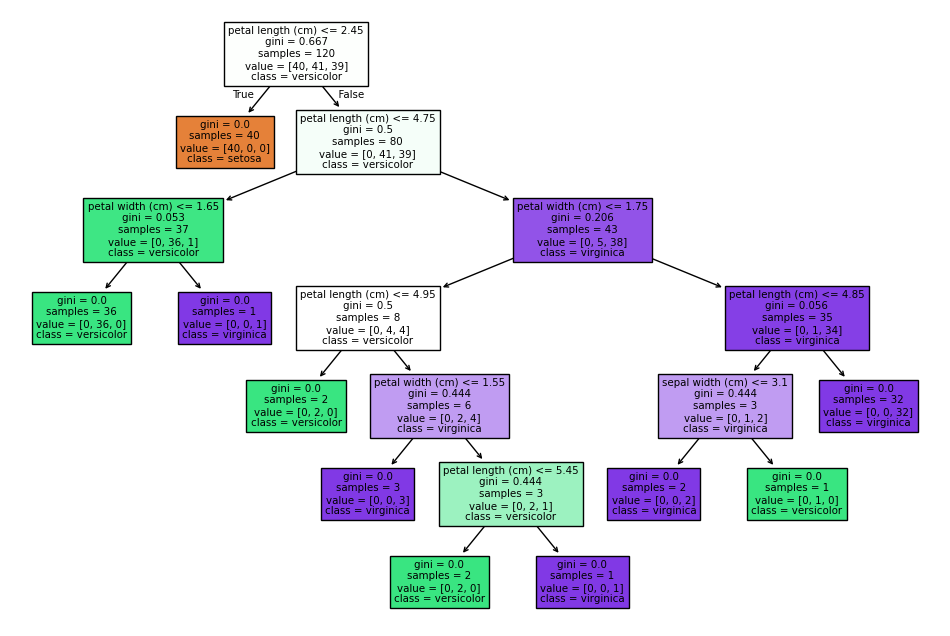

Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
 
for class_index, class_name in enumerate(iris.target_names):
    print(f"Rules for {class_name}:\n")
    for line in tree_rules.split('\n'):
        if f"class: {class_index}" in line:
            print(line)
    print("\n")

              mean       std
alcohol  10.038664  1.958432
acidity   5.070836  0.997454
pH        3.201750  0.295036


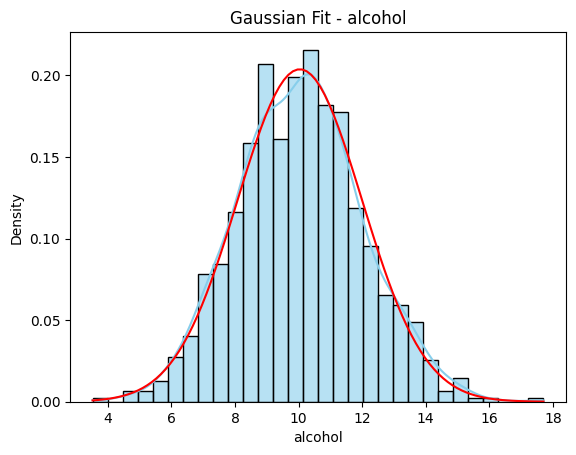

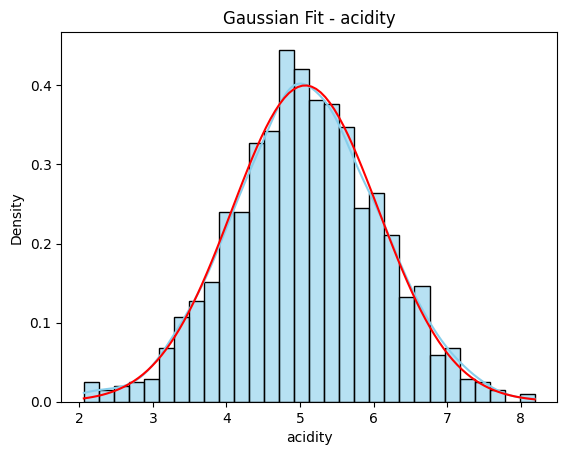

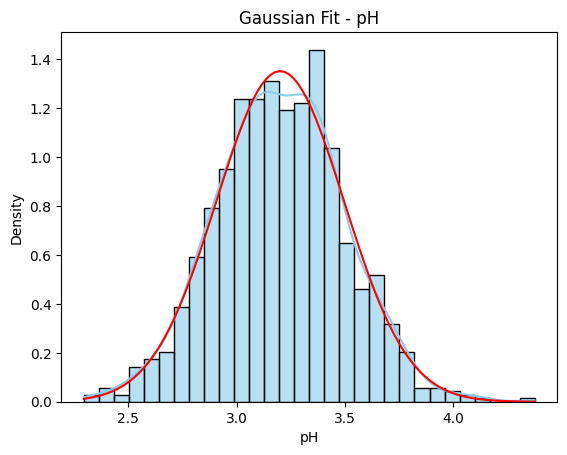


Correlation with Quality:
alcohol   -0.031799
acidity   -0.045315
pH         0.016110
Name: quality, dtype: float64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Generate synthetic wine data
np.random.seed(42)
df = pd.DataFrame({
    'alcohol': np.random.normal(10, 2, 1000),
    'acidity': np.random.normal(5, 1, 1000),
    'pH': np.random.normal(3.2, 0.3, 1000),
    'quality': np.random.randint(3, 10, 1000)
})

# Feature statistics
features = ['alcohol', 'acidity', 'pH']
stats = df[features].agg(['mean', 'std']).T
print(stats)

# Plot Gaussian fits
for f in features:
    sns.histplot(df[f], bins=30, stat="density", kde=True, color='skyblue', alpha=0.6)
    x = np.linspace(df[f].min(), df[f].max(), 100)
    plt.plot(x, norm.pdf(x, stats.loc[f, 'mean'], stats.loc[f, 'std']), 'r')
    plt.title(f'Gaussian Fit - {f}')
    plt.show()

# Correlation with quality
print("\nCorrelation with Quality:")
print(df.corr()['quality'].drop('quality'))

[[1218    2    9    2    4    2   52    2   32   20]
 [   2 1520    3    5    0    4   15    1   39   11]
 [ 142   40  408  102    5    5  331    0  327   20]
 [ 118   66   12  462    2    8   90    9  496  170]
 [  51    7   15    6  170    7  146    5  278  610]
 [ 183   31   10   18    4   56   77    3  757  134]
 [  16   25    6    0    2    4 1316    0   24    3]
 [   8   10    3   16    8    3    1  417   50  987]
 [  28  160    5    9    3    3   30    3  816  300]
 [   9    8    7    4    8    0    1   20   24 1339]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1380
           3       0.74      0.32      0.45      1433
           4       0.83      0.13      0.23      1295
           5       0.61      0.04      0.08      1273
           6       0.64      0.94      0.76      1396
           7       0.91      0.28   

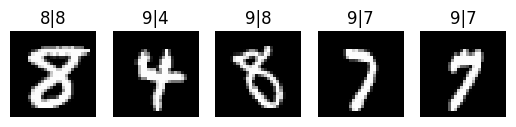

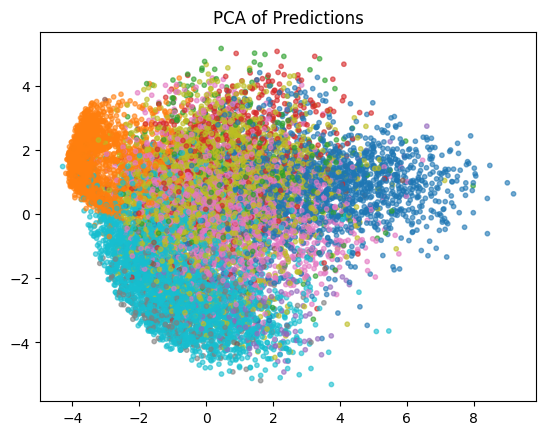

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load and preprocess MNIST
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize sample predictions
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'{y_pred[i]}|{y_test.iloc[i]}')
    plt.axis('off')
plt.show()

# PCA Visualization
X_pca = PCA(n_components=2).fit_transform(X_test)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='tab10', s=10, alpha=0.6)
plt.title("PCA of Predictions")
plt.show()

Accuracy: 0.7738980350504514
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74 

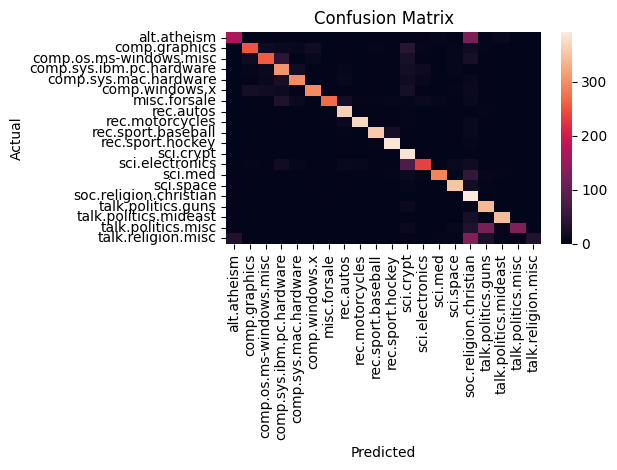

['text_classifier.pkl']

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load data
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

# Build pipeline
model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train and predict
model.fit(train.data, train.target)
pred = model.predict(test.data)

# Evaluate
print("Accuracy:", metrics.accuracy_score(test.target, pred))
print(metrics.classification_report(test.target, pred, target_names=test.target_names))

# Confusion matrix
sns.heatmap(metrics.confusion_matrix(test.target, pred),
             fmt='d',
            xticklabels=test.target_names, 
            yticklabels=test.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Save model
joblib.dump(model, "text_classifier.pkl")

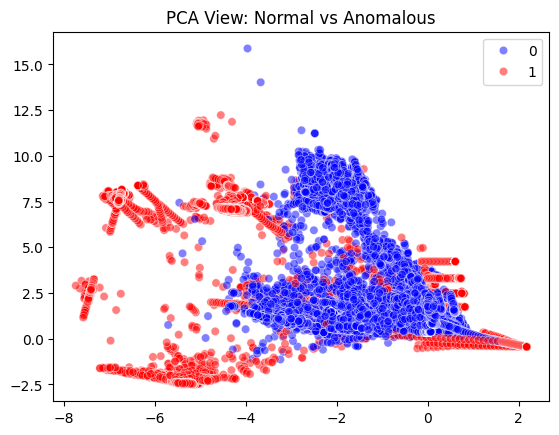

              precision    recall  f1-score   support

           0       0.17      0.78      0.28     97278
           1       0.56      0.07      0.12    396743

    accuracy                           0.21    494021
   macro avg       0.36      0.42      0.20    494021
weighted avg       0.48      0.21      0.15    494021



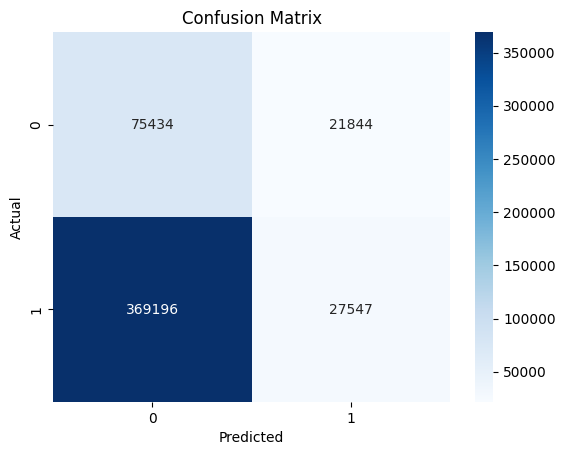

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv("kddcup.data_10_percent_corrected", header=None)
df[41] = df[41].apply(lambda x: 1 if x.strip() != 'normal.' else 0)  # 1 = anomaly

# Preprocess
cat_cols = [1, 2, 3]
num_cols = list(set(df.columns) - set(cat_cols) - {41})

X_cat = OneHotEncoder(sparse_output=False).fit_transform(df[cat_cols])
X_num = StandardScaler().fit_transform(df[num_cols])
X = np.hstack((X_num, X_cat))
y = df[41].values

# PCA for visualization
X_pca = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette=["blue", "red"], alpha=0.5)
plt.title("PCA View: Normal vs Anomalous")
plt.show()

# Train Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
y_pred = model.fit_predict(X)
y_pred = np.where(y_pred == 1, 0, 1)  # 1=anomaly, 0=normal

# Evaluate
print(classification_report(y, y_pred))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
c:\Users\Sarthak\OneDrive\Documents\Desktop\lab test codes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sarthak\OneDrive\Documents\Desktop\lab test codes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sam

Accuracy: 0.56
              precision    recall  f1-score   support

        Exon       0.00      0.00      0.00        11
      Intron       0.56      1.00      0.72        14

    accuracy                           0.56        25
   macro avg       0.28      0.50      0.36        25
weighted avg       0.31      0.56      0.40        25



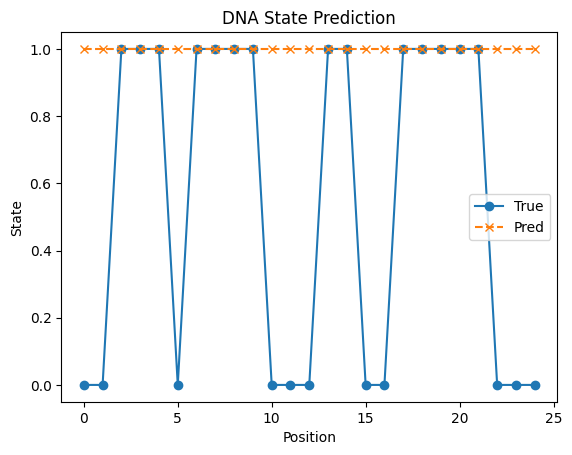

In [ ]:
import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import mode
import matplotlib.pyplot as plt

seqs = ["ATGCG", "CGTGA", "GCGTT", "ATGCC", "TTGCA"]
labels = ["EEIII", "EIIII", "EEEII", "EEIII", "IIEEE"]
obs_map = {"A": 0, "T": 1, "G": 2, "C": 3}
state_map = {"E": 0, "I": 1}

X = np.concatenate([[obs_map[c] for c in seq] for seq in seqs]).reshape(-1,1)
y = np.concatenate([[state_map[c] for c in lab] for lab in labels])
lengths = [len(seq) for seq in seqs]

model = hmm.MultinomialHMM(n_components=2, n_iter=100).fit(X, lengths)
_, hidden = model.decode(X)
mapped = {s: mode(y[hidden==s], keepdims=True).mode[0] for s in np.unique(hidden)}
pred = np.array([mapped[s] for s in hidden])

print("Accuracy:", accuracy_score(y, pred))
print(classification_report(y, pred, target_names=["Exon", "Intron"]))

plt.plot(y, label="True", marker='o')
plt.plot(pred, label="Pred", linestyle='--', marker='x')
plt.legend(); plt.title("DNA State Prediction"); plt.xlabel("Position"); plt.ylabel("State")
plt.show() 

In [7]:
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from scipy.stats import mode

states = ["sunny", "cloudy", "rainy"]
trans_mat = np.array([[0.7,0.2,0.1],[0.3,0.4,0.3],[0.2,0.3,0.5]])
means = {"sunny":[30,30],"cloudy":[22,50],"rainy":[18,80]}
covs = {"sunny":[[5,2],[2,3]],"cloudy":[[4,1],[1,4]],"rainy":[[3,1],[1,3]]}

def simulate_weather_sequence(n_days=300):
    obs, states_idx = [], []
    s = np.random.choice(len(states))
    for _ in range(n_days):
        obs.append(np.random.multivariate_normal(means[states[s]], covs[states[s]]))
        states_idx.append(s)
        s = np.random.choice(len(states), p=trans_mat[s])
    return np.array(states_idx), np.array(obs)

true_states, observations = simulate_weather_sequence()

discrete_obs = KBinsDiscretizer(n_bins=4, encode='ordinal').fit_transform(observations).astype(int)
obs_symbols = (discrete_obs[:, 0]*4 + discrete_obs[:, 1]).reshape(-1,1)

model_d = hmm.MultinomialHMM(n_components=3, n_iter=1000).fit(obs_symbols)
pred_d = model_d.predict(obs_symbols)

model_c = hmm.GaussianHMM(n_components=3, covariance_type='full', n_iter=1000).fit(observations)
pred_c = model_c.predict(observations)

def map_states(true, pred):
    return np.vectorize(lambda x: mode(true[pred==x], keepdims=True).mode[0] if len(true[pred==x]) else x)(pred)

print("Discrete HMM Accuracy:", accuracy_score(true_states, map_states(true_states, pred_d)))
print("Continuous HMM Accuracy:", accuracy_score(true_states, map_states(true_states, pred_c)))


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Discrete HMM Accuracy: 0.4866666666666667
Continuous HMM Accuracy: 1.0


Accuracy: 0.8163606010016694


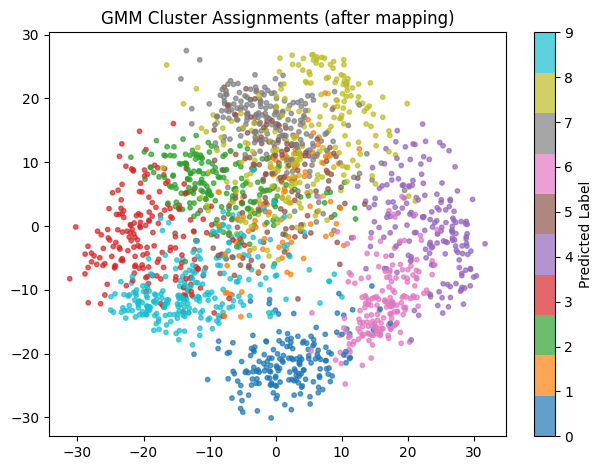

In [8]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt

digits = load_digits()
X_pca_30 = PCA(n_components=30).fit_transform(digits.data)
gmm = GaussianMixture(n_components=10, random_state=42).fit(X_pca_30)
pred = gmm.predict(X_pca_30)

def map_labels(y_true, y_pred):
    mapped = np.zeros_like(y_pred)
    for i in range(10):
        mask = (y_pred == i)
        if np.any(mask): mapped[mask] = mode(y_true[mask], keepdims=False).mode
    return mapped

final = map_labels(digits.target, pred)
print("Accuracy:", accuracy_score(digits.target, final))

X_pca_2 = PCA(n_components=2).fit_transform(digits.data)
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=final, cmap='tab10', s=10, alpha=0.7)
plt.title("GMM Cluster Assignments (after mapping)")
plt.colorbar(label="Predicted Label")
plt.tight_layout()
plt.show()

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X = X[:, 2:4]  # petal length & width
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)

best_k, best_acc = 1, 0
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k).fit(Xtr, ytr)
    acc = accuracy_score(yte, model.predict(Xte))
    if acc > best_acc: best_k, best_acc = k, acc
    print(f"K={k}, Accuracy={acc:.2f}")

final_model = KNeighborsClassifier(n_neighbors=best_k).fit(Xtr, ytr)
final_preds = final_model.predict(Xte)
print(f"Best K: {best_k}, Accuracy: {best_acc:.2f}")


K=1, Accuracy=0.98
K=2, Accuracy=0.98
K=3, Accuracy=1.00
K=4, Accuracy=1.00
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00
K=11, Accuracy=1.00
K=12, Accuracy=1.00
K=13, Accuracy=1.00
K=14, Accuracy=1.00
K=15, Accuracy=1.00
K=16, Accuracy=1.00
K=17, Accuracy=1.00
K=18, Accuracy=1.00
K=19, Accuracy=1.00
K=20, Accuracy=1.00
Best K: 3, Accuracy: 1.00


Classification Report:
              precision    recall  f1-score   support

      circle       0.95      1.00      0.97        35
      square       1.00      0.93      0.96        28
    triangle       1.00      1.00      1.00        27

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90

Confusion Matrix:
[[35  0  0]
 [ 2 26  0]
 [ 0  0 27]]


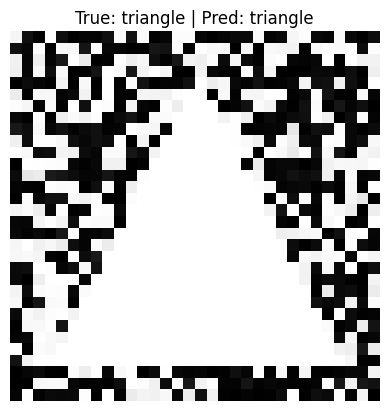

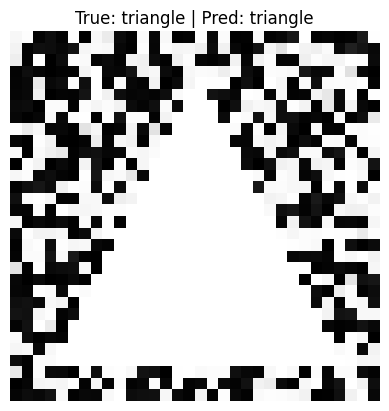

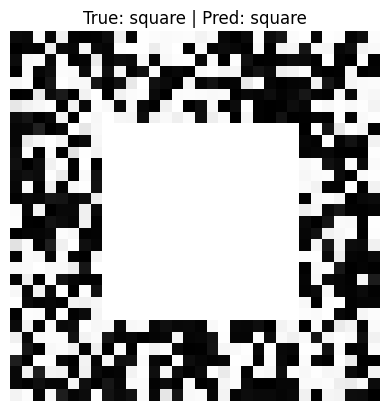

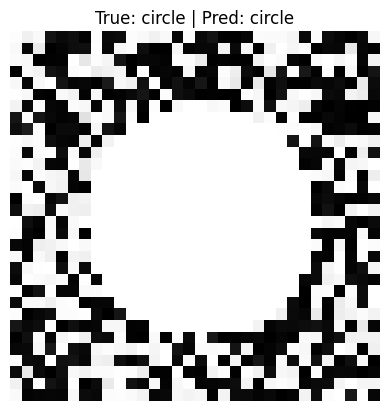

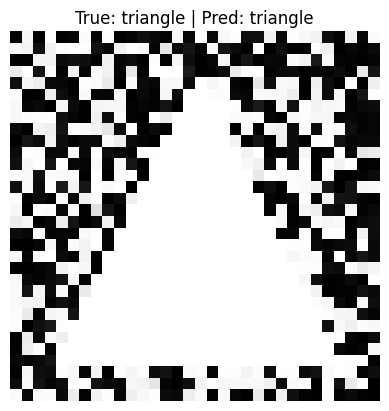

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def generate_shape(shape, size=32):
    img = np.zeros((size, size), dtype=np.uint8)
    if shape == "circle":
        cv2.circle(img, (16,16), 10, 255, -1)
    elif shape == "square":
        cv2.rectangle(img, (8,8), (24,24), 255, -1)
    elif shape == "triangle":
        pts = np.array([[16,4],[4,28],[28,28]], np.int32)
        cv2.drawContours(img, [pts], 0, 255, -1)
    return img

def create_dataset(n=100):
    X, y, shapes = [], [], ["circle", "square", "triangle"]
    for idx, shape in enumerate(shapes):
        for _ in range(n):
            img = generate_shape(shape)
            noise = np.random.normal(0, 10, img.shape).astype(np.uint8)
            noisy_img = cv2.add(img, noise)
            X.append(noisy_img.flatten())
            y.append(idx)
    return np.array(X), np.array(y), shapes

X, y, labels = create_dataset(n=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

for i in range(5):
    img = X_test[i].reshape(32, 32)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {labels[y_test[i]]} | Pred: {labels[y_pred[i]]}")
    plt.axis('off')
    plt.show()